In [108]:
import pymc3 as pm
import numpy as np
import theano
import seaborn
import matplotlib.pyplot as plt
seaborn.set_context('poster')
seaborn.set_style('white')
seaborn.set(color_codes=True)

%matplotlib inline


In [109]:
loc1 = 10
scale1 = 1
size1 = 10000

loc2 = 12
scale2 = 3
size2 = 10000

sample1 = np.random.normal(loc=loc1, scale=scale1, size=size1)
sample2 = np.random.normal(loc=loc2, scale=scale2, size=size2)

with pm.Model() as model:
    mu1 = pm.Flat('mu1')
    sd1 = pm.Exponential('sd1', lam=1)
    data1 = pm.Normal('data1', mu=mu1, sd=sd1, observed=sample1)

    mu2 = pm.Flat('mu2')
    sd2 = pm.Exponential('sd2', lam=1)
    data2 = pm.Normal('data2', mu=mu2, sd=sd2, observed=sample2)
    
    diff_mu = pm.Deterministic('diff_mu', mu2 - mu1)
    diff_sd = pm.Deterministic('diff_sd', sd2 - sd1)
    effect_size = pm.Deterministic('effect size',
                                    diff_mu / pm.sqrt((sd1**2 + sd2**2) / 2))

Applied log-transform to sd1 and added transformed sd1_log_ to model.
Applied log-transform to sd2 and added transformed sd2_log_ to model.


In [110]:
sample1

array([  9.9162823 ,   8.44121955,  10.01854652, ...,  11.52972237,
        11.01954397,   9.53481565])

In [111]:
sample2

array([ 11.6161535 ,  11.5866086 ,  14.64553771, ...,  12.54647135,
        12.25003106,  12.98251063])

In [112]:
with model:
    trace = pm.sample(draws=2000, njobs=4)

Assigned NUTS to mu1
Assigned NUTS to sd1_log_
Assigned NUTS to mu2
Assigned NUTS to sd2_log_
 [-----------------100%-----------------] 2000 of 2000 complete in 66.2 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x140936630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x148a05908>]], dtype=object)

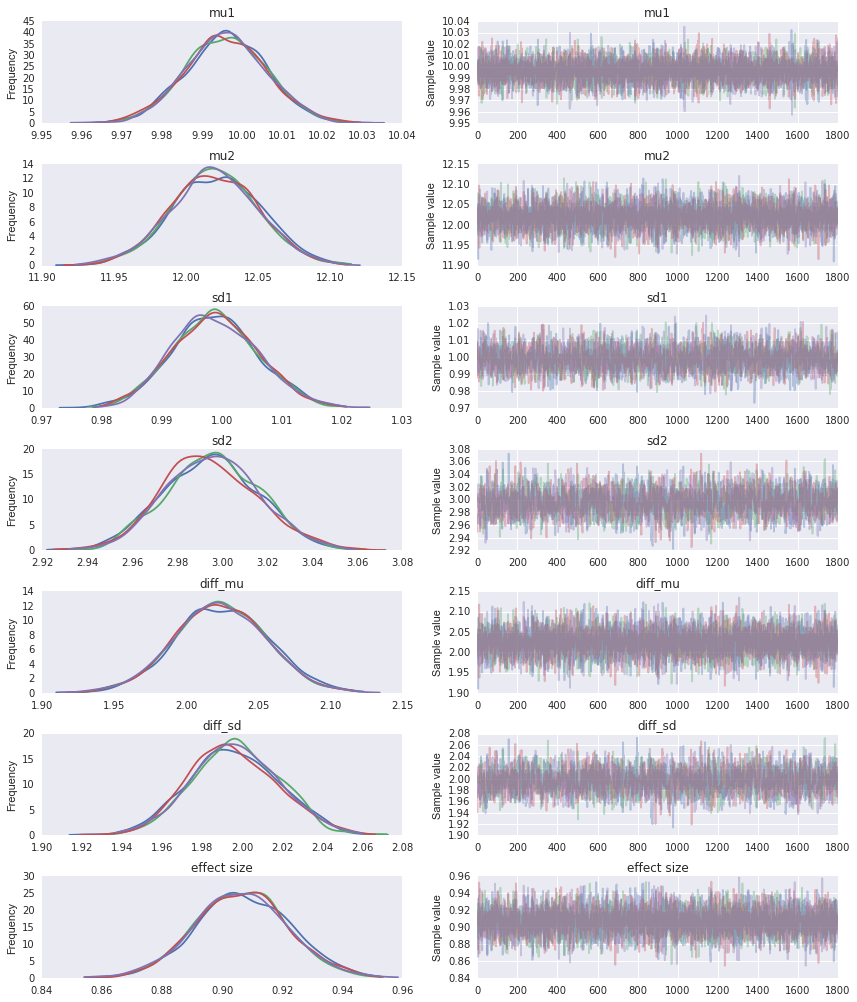

In [113]:
pm.traceplot(trace[200:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13f2b5cf8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x14c1e50b8>], dtype=object)

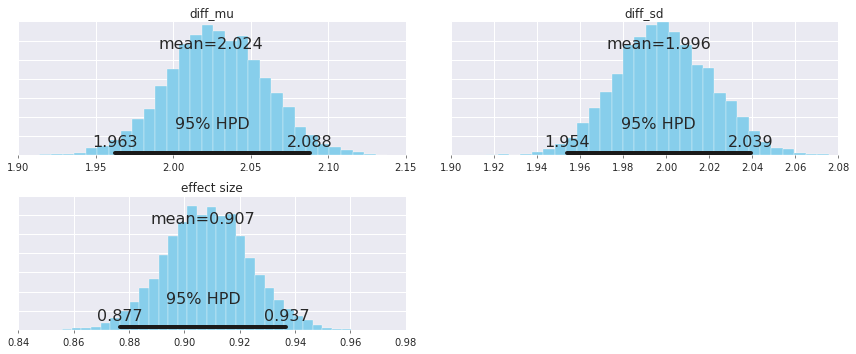

In [116]:
pm.plot_posterior(trace[200:], varnames=['diff_mu', 'diff_sd', 'effect size'], color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x143bbf5f8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x145b8bf60>], dtype=object)

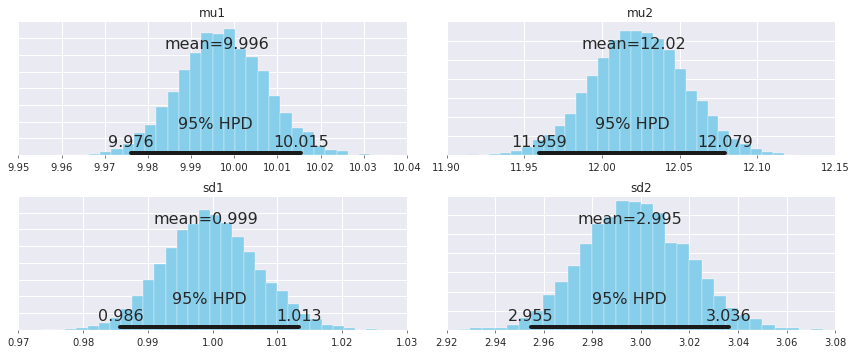

In [115]:
pm.plot_posterior(trace[200:], varnames=['mu1', 'mu2', 'sd1', 'sd2'], color='#87ceeb',)